In [2]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Datos

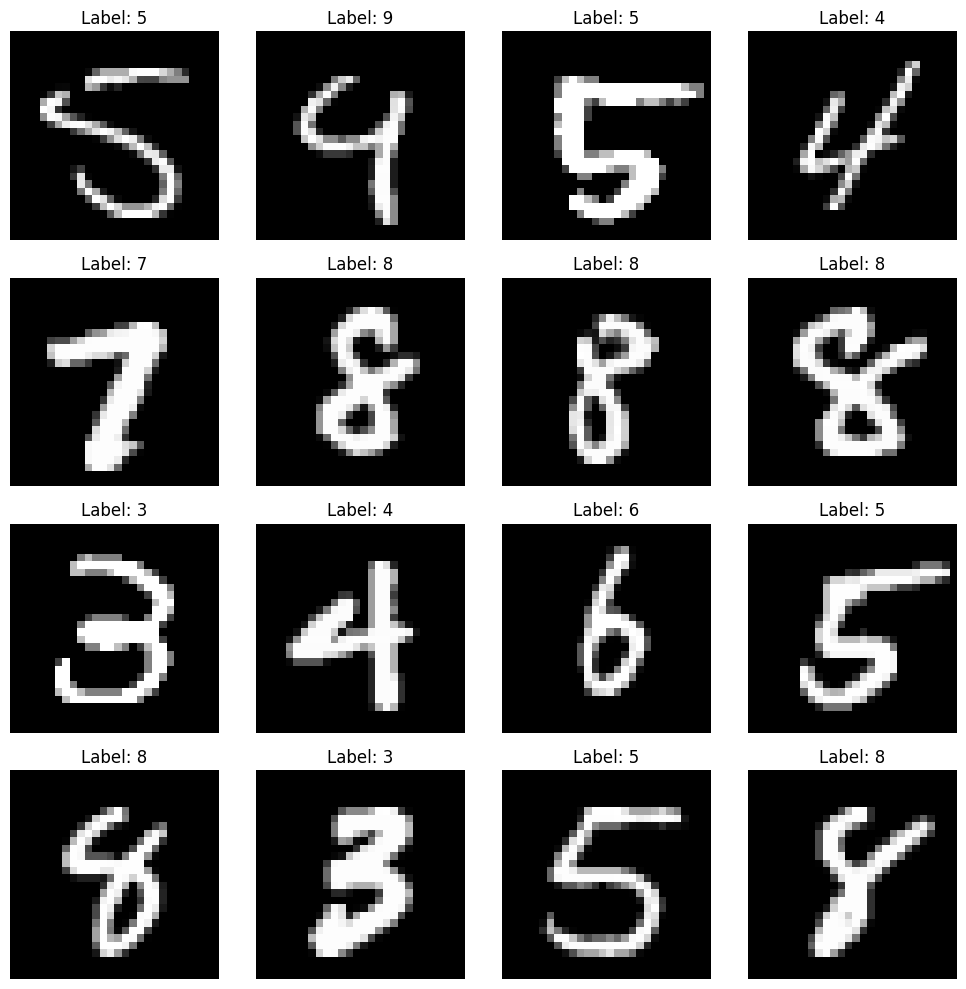

In [3]:

# Load MNIST dataset
# Definimos una secuencia de transformaciones para aplicar a las imágenes del dataset.
# En este caso, solo convertimos las imágenes a tensores utilizando `ToTensor()`.
# Esto es necesario para que las imágenes estén en un formato compatible con PyTorch.
transform = transforms.Compose([
    transforms.ToTensor()  # Convierte la imagen de un formato PIL o numpy.ndarray a un tensor.
])

# Cargamos el dataset MNIST de entrenamiento.
# `root='./data'` especifica el directorio donde se descargarán los datos si no están presentes.
# `train=True` indica que queremos el conjunto de datos de entrenamiento.
# `transform=transform` aplica las transformaciones definidas previamente a cada imagen.
# `download=True` descarga los datos si no están disponibles en el directorio especificado.
mnist_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)

# Creamos un DataLoader que nos permite cargar los datos en lotes pequeños.
# `dataset=mnist_dataset` es el dataset que se cargará.
# `batch_size=16` indica que cada lote contendrá 16 imágenes y etiquetas.
# `shuffle=True` mezcla los datos aleatoriamente en cada época, mejorando la generalización del modelo.
data_loader = DataLoader(
    mnist_dataset, batch_size=16, shuffle=True
)

# Obtenemos un único lote de datos del DataLoader.
# `next(iter(data_loader))` convierte el DataLoader en un iterador y toma el primer lote.
# El lote contiene `images` (los tensores de las imágenes) y `labels` (las etiquetas correspondientes).
images, labels = next(iter(data_loader))


# Plot the images in a grid
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f'Label: {labels[i].item()}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Arquitectura

In [6]:

# Definimos el modelo MLP
# MLP hereda de nn.Module, lo que permite utilizar las funciones y propiedades de PyTorch
# para crear, entrenar y evaluar redes neuronales.
#class MLP(nn.Module):
    #def __init__(self):
        ##super(MLP, self).__init__()
        #self.fc1 = nn.Linear(28 * 28, 128)  # Una capa oculta con 128 neuronas
        #self.fc2 = nn.Linear(128, 10)        # Capa de salida con 10 neuronas (para 10 dígitos)
        #self.relu = nn.ReLU()

    #def forward(self, x):
        #x = x.view(-1, 28 * 28)
        #x = self.relu(self.fc1(x))
        ##x = self.fc2(x)
        #return x

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # Primera capa oculta con 256 neuronas
        self.fc2 = nn.Linear(256, 128)      # Segunda capa oculta con 128 neuronas
        self.fc3 = nn.Linear(128, 10)       # Capa de salida con 10 neuronas
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#class MLP(nn.Module):
    #def __init__(self):
        #super(MLP, self).__init__()
        #self.fc1 = nn.Linear(28 * 28, 128)  # Primera capa oculta con 128 neuronas
        #self.fc2 = nn.Linear(128, 64)       # Segunda capa oculta con 64 neuronas
        #self.fc3 = nn.Linear(64, 10)        # Capa de salida con 10 neuronas
        #self.tanh = nn.Tanh()               # Función de activación Tanh

    #def forward(self, x):
        #x = x.view(-1, 28 * 28)
        #x = self.tanh(self.fc1(x))
        #x = self.tanh(self.fc2(x))
        #x = self.fc3(x)
        #return x

# Entrenamiento

In [14]:
import time
# Lista de estrategias de entrenamiento
training_strategies = [
    {"optimizer": "SGD", "lr": 0.01, "batch_size": 64, "epochs": 5},
    {"optimizer": "SGD", "lr": 0.01, "batch_size": 128, "epochs": 10},
    {"optimizer": "Adam", "lr": 0.001, "batch_size": 64, "epochs": 5},
    {"optimizer": "Adam", "lr": 0.0005, "batch_size": 128, "epochs": 10},
    {"optimizer": "RMSprop", "lr": 0.001, "batch_size": 64, "epochs": 5},
    {"optimizer": "RMSprop", "lr": 0.0005, "batch_size": 128, "epochs": 10}
]

results = []

for strategy in training_strategies:
    print(f"\nEstrategia: Optimizador={strategy['optimizer']}, LR={strategy['lr']}, Batch Size={strategy['batch_size']}, Epochs={strategy['epochs']}")

    # Crear DataLoader con el tamaño del lote especificado
    train_loader = DataLoader(train_dataset, batch_size=strategy["batch_size"], shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=strategy["batch_size"], shuffle=False)

    # Crear el modelo
    model = MLP().to(device)

    # Definir la función de pérdida
    criterion = nn.CrossEntropyLoss()

    # Elegir el optimizador
    if strategy["optimizer"] == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=strategy["lr"])
    elif strategy["optimizer"] == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=strategy["lr"])
    elif strategy["optimizer"] == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), lr=strategy["lr"])

    # Medir el tiempo de entrenamiento
    start_time = time.time()

    # Entrenar el modelo
    for epoch in range(strategy["epochs"]):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        print(f"Época [{epoch + 1}/{strategy['epochs']}], Pérdida: {running_loss / len(train_loader):.4f}")

# Calcular el tiempo total de entrenamiento
    training_time = time.time() - start_time

    # Evaluar el modelo
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")

    # Guardar los resultados
    results.append({
        "Optimizer": strategy["optimizer"],
        "Learning Rate": strategy["lr"],
        "Batch Size": strategy["batch_size"],
        "Epochs": strategy["epochs"],
        "Accuracy": accuracy,
        "Training Time (s)": training_time
    })

# Mostrar los resultados finales
import pandas as pd
results_df = pd.DataFrame(results)
print("\nResultados Finales:")
print(results_df)




Estrategia: Optimizador=SGD, LR=0.01, Batch Size=64, Epochs=5
Época [1/5], Pérdida: 0.9306
Época [2/5], Pérdida: 0.3693
Época [3/5], Pérdida: 0.3167
Época [4/5], Pérdida: 0.2874
Época [5/5], Pérdida: 0.2629
Accuracy: 92.75%
Tiempo de entrenamiento: 160.60 segundos

Estrategia: Optimizador=SGD, LR=0.01, Batch Size=128, Epochs=10
Época [1/10], Pérdida: 1.4704
Época [2/10], Pérdida: 0.5143
Época [3/10], Pérdida: 0.3896
Época [4/10], Pérdida: 0.3448
Época [5/10], Pérdida: 0.3186
Época [6/10], Pérdida: 0.2991
Época [7/10], Pérdida: 0.2835
Época [8/10], Pérdida: 0.2699
Época [9/10], Pérdida: 0.2575
Época [10/10], Pérdida: 0.2454
Accuracy: 93.30%
Tiempo de entrenamiento: 198.05 segundos

Estrategia: Optimizador=Adam, LR=0.001, Batch Size=64, Epochs=5
Época [1/5], Pérdida: 0.3377
Época [2/5], Pérdida: 0.1498
Época [3/5], Pérdida: 0.1099
Época [4/5], Pérdida: 0.0888
Época [5/5], Pérdida: 0.0768
Accuracy: 96.39%
Tiempo de entrenamiento: 154.72 segundos

Estrategia: Optimizador=Adam, LR=0.0005, 

# Evaluación del modelo

In [15]:
model.eval()  # Ponemos el modelo en modo evaluación (desactiva Dropout)
correct = 0
total = 0
with torch.no_grad():  # Desactivamos el cálculo de gradientes para evaluación
    for images, labels in test_loader:  # Iteramos sobre los datos de prueba
        outputs = model(images)         # Hacemos predicciones
        _, predicted = torch.max(outputs.data, 1)  # Obtenemos la clase con mayor probabilidad
        total += labels.size(0)         # Total de muestras evaluadas
        correct += (predicted == labels).sum().item()  # Contamos las predicciones correctas

# Calculamos y mostramos la precisión del modelo
accuracy = 100 * correct / total
print(f"Accuracy en el conjunto de prueba: {accuracy:.2f}%")

Accuracy en el conjunto de prueba: 97.60%


In [16]:
# Verificar si hay una GPU disponible, de lo contrario usar la CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Preprocesamiento: Definir transformaciones para los datos
transform = transforms.Compose([
    transforms.ToTensor(),                # Convertir imágenes a tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizar los valores a un rango de [-1, 1]
])

# Cargar el conjunto de datos MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)  # Datos de entrenamiento
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)  # Datos de prueba

# Crear DataLoaders para manejar los datos de forma eficiente
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)   # Loader para entrenamiento (batch de 128, mezclado)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)    # Loader para prueba (batch de 128, sin mezclar)

architectures = [
    {"filters_l1": 16, "filters_l2": 32, "final_layer_size": 128, "dropout_rate": 0.2, "additional_fc_layers": 0},
    {"filters_l1": 32, "filters_l2": 64, "final_layer_size": 256, "dropout_rate": 0.3, "additional_fc_layers": 1},
    {"filters_l1": 64, "filters_l2": 128, "final_layer_size": 512, "dropout_rate": 0.4, "additional_fc_layers": 2},
    {"filters_l1": 32, "filters_l2": 64, "final_layer_size": 128, "dropout_rate": 0.2, "additional_fc_layers": 1},
    {"filters_l1": 64, "filters_l2": 128, "final_layer_size": 256, "dropout_rate": 0.4, "additional_fc_layers": 0},
]


class CNN(nn.Module):
    def __init__(self, filters_l1, filters_l2, final_layer_size, dropout_rate, additional_fc_layers=0):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, filters_l1, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(filters_l1, filters_l2, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Cálculo del tamaño de entrada para la capa lineal
        self.fc_input_size = filters_l2 * 7 * 7

        # Capas lineales
        self.fc1 = nn.Linear(self.fc_input_size, final_layer_size)
        self.dropout = nn.Dropout(dropout_rate)

        # Capas lineales adicionales
        self.additional_fcs = nn.ModuleList([
            nn.Linear(final_layer_size, final_layer_size) for _ in range(additional_fc_layers)
        ])

        self.fc2 = nn.Linear(final_layer_size, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, self.fc_input_size)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        
        for fc in self.additional_fcs:
            x = self.relu(fc(x))
            x = self.dropout(x)

        x = self.fc2(x)
        return x
    

results = []

for arch in architectures:
    print(f"\nArquitectura: Filtros={arch['filters_l1']}-{arch['filters_l2']}, Final Layer Neurons={arch['final_layer_size']}, Dropout={arch['dropout_rate']}, Additional FC Layers={arch['additional_fc_layers']}")

    # Crear el modelo
    model = CNN(**arch).to(device)

    # Definir la función de pérdida y el optimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Medir el tiempo de entrenamiento
    start_time = time.time()

    # Entrenar el modelo
    epochs = 5
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        print(f"Época [{epoch + 1}/{epochs}], Pérdida: {running_loss / len(train_loader):.4f}")

    # Calcular el tiempo total de entrenamiento
    training_time = time.time() - start_time

    # Evaluar el modelo
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")

    # Guardar los resultados
    results.append({
        "Filters": f"{arch['filters_l1']}-{arch['filters_l2']}",
        "Final Layer Neurons": arch["final_layer_size"],
        "Dropout": arch["dropout_rate"],
        "Additional FC Layers": arch["additional_fc_layers"],
        "Accuracy": accuracy,
        "Training Time (s)": training_time
    })

# Mostrar los resultados finales
results_df = pd.DataFrame(results)
print("\nResultados Finales:")
print(results_df)



Arquitectura: Filtros=16-32, Final Layer Neurons=128, Dropout=0.2, Additional FC Layers=0
Época [1/5], Pérdida: 0.2959
Época [2/5], Pérdida: 0.0746
Época [3/5], Pérdida: 0.0536
Época [4/5], Pérdida: 0.0425
Época [5/5], Pérdida: 0.0344
Accuracy: 99.02%
Tiempo de entrenamiento: 294.38 segundos

Arquitectura: Filtros=32-64, Final Layer Neurons=256, Dropout=0.3, Additional FC Layers=1
Época [1/5], Pérdida: 0.2397
Época [2/5], Pérdida: 0.0618
Época [3/5], Pérdida: 0.0445
Época [4/5], Pérdida: 0.0338
Época [5/5], Pérdida: 0.0287
Accuracy: 99.37%
Tiempo de entrenamiento: 244.30 segundos

Arquitectura: Filtros=64-128, Final Layer Neurons=512, Dropout=0.4, Additional FC Layers=2
Época [1/5], Pérdida: 0.2342
Época [2/5], Pérdida: 0.0635
Época [3/5], Pérdida: 0.0466
Época [4/5], Pérdida: 0.0374
Época [5/5], Pérdida: 0.0308
Accuracy: 99.29%
Tiempo de entrenamiento: 479.36 segundos

Arquitectura: Filtros=32-64, Final Layer Neurons=128, Dropout=0.2, Additional FC Layers=1
Época [1/5], Pérdida: 0.28

In [17]:
# Verificar si hay una GPU disponible, de lo contrario usar la CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Preprocesamiento: Definir transformaciones para los datos
transform = transforms.Compose([
    transforms.ToTensor(),                # Convertir imágenes a tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizar los valores a un rango de [-1, 1]
])

# Cargar el conjunto de datos MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)  # Datos de entrenamiento
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)  # Datos de prueba

# Crear DataLoaders para manejar los datos de forma eficiente
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)   # Loader para entrenamiento (batch de 128, mezclado)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)    # Loader para prueba (batch de 128, sin mezclar)

class CNN(nn.Module):
    def __init__(self, filters_l1, filters_l2, final_layer_size, dropout_rate, additional_fc_layers=0):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, filters_l1, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(filters_l1, filters_l2, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Cálculo del tamaño de entrada para la capa lineal
        self.fc_input_size = filters_l2 * 7 * 7

        # Capas lineales
        self.fc1 = nn.Linear(self.fc_input_size, final_layer_size)
        self.dropout = nn.Dropout(dropout_rate)

        # Capas lineales adicionales
        self.additional_fcs = nn.ModuleList([
            nn.Linear(final_layer_size, final_layer_size) for _ in range(additional_fc_layers)
        ])

        self.fc2 = nn.Linear(final_layer_size, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, self.fc_input_size)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        
        for fc in self.additional_fcs:
            x = self.relu(fc(x))
            x = self.dropout(x)

        x = self.fc2(x)
        return x
    

# Lista de estrategias de entrenamiento
training_strategies = [
    {"optimizer": "SGD", "lr": 0.01},
    {"optimizer": "SGD", "lr": 0.001},
    {"optimizer": "Adam", "lr": 0.001},
    {"optimizer": "Adam", "lr": 0.0005},
    {"optimizer": "RMSprop", "lr": 0.001},
    {"optimizer": "RMSprop", "lr": 0.0005}
]

# Entrenamiento y evaluación
results = []

for strategy in training_strategies:
    print(f"\nEstrategia: Optimizador={strategy['optimizer']}, Learning Rate={strategy['lr']}")

    # Crear el modelo con una arquitectura fija
    model = CNN(filters_l1=32, filters_l2=64, final_layer_size=128, dropout_rate=0.2).to(device)

    # Definir la función de pérdida
    criterion = nn.CrossEntropyLoss()

    # Elegir el optimizador
    if strategy["optimizer"] == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=strategy["lr"])
    elif strategy["optimizer"] == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=strategy["lr"])
    elif strategy["optimizer"] == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), lr=strategy["lr"])

    # Medir el tiempo de entrenamiento
    start_time = time.time()

    # Entrenar el modelo
    epochs = 5
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        print(f"Época [{epoch + 1}/{epochs}], Pérdida: {running_loss / len(train_loader):.4f}")

    # Calcular el tiempo total de entrenamiento
    training_time = time.time() - start_time

    # Evaluar el modelo
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")

    # Guardar los resultados
    results.append({
        "Optimizer": strategy["optimizer"],
        "Learning Rate": strategy["lr"],
        "Accuracy": accuracy,
        "Training Time (s)": training_time
    })

# Mostrar los resultados finales
results_df = pd.DataFrame(results)
print("\nResultados Finales:")
print(results_df)


Estrategia: Optimizador=SGD, Learning Rate=0.01
Época [1/5], Pérdida: 1.4754
Época [2/5], Pérdida: 0.3886
Época [3/5], Pérdida: 0.2546
Época [4/5], Pérdida: 0.1912
Época [5/5], Pérdida: 0.1528
Accuracy: 96.75%
Tiempo de entrenamiento: 278.00 segundos

Estrategia: Optimizador=SGD, Learning Rate=0.001
Época [1/5], Pérdida: 2.2796
Época [2/5], Pérdida: 2.2256
Época [3/5], Pérdida: 2.1331
Época [4/5], Pérdida: 1.9482
Época [5/5], Pérdida: 1.6115
Accuracy: 74.99%
Tiempo de entrenamiento: 206.62 segundos

Estrategia: Optimizador=Adam, Learning Rate=0.001
Época [1/5], Pérdida: 0.2320
Época [2/5], Pérdida: 0.0613
Época [3/5], Pérdida: 0.0443
Época [4/5], Pérdida: 0.0359
Época [5/5], Pérdida: 0.0287
Accuracy: 98.96%
Tiempo de entrenamiento: 292.79 segundos

Estrategia: Optimizador=Adam, Learning Rate=0.0005
Época [1/5], Pérdida: 0.3496
Época [2/5], Pérdida: 0.0869
Época [3/5], Pérdida: 0.0601
Época [4/5], Pérdida: 0.0482
Época [5/5], Pérdida: 0.0402
Accuracy: 99.00%
Tiempo de entrenamiento: 66